In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta
import numpy as np

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 6)

In [4]:
repos_path = "C:/Users/MANOJ/the-building-data-genome-project/"

In [5]:
temp = pd.read_csv(os.path.join(repos_path,"data/raw/temp_open_utc.csv"), index_col="timestamp", parse_dates=True)

In [6]:
meta = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

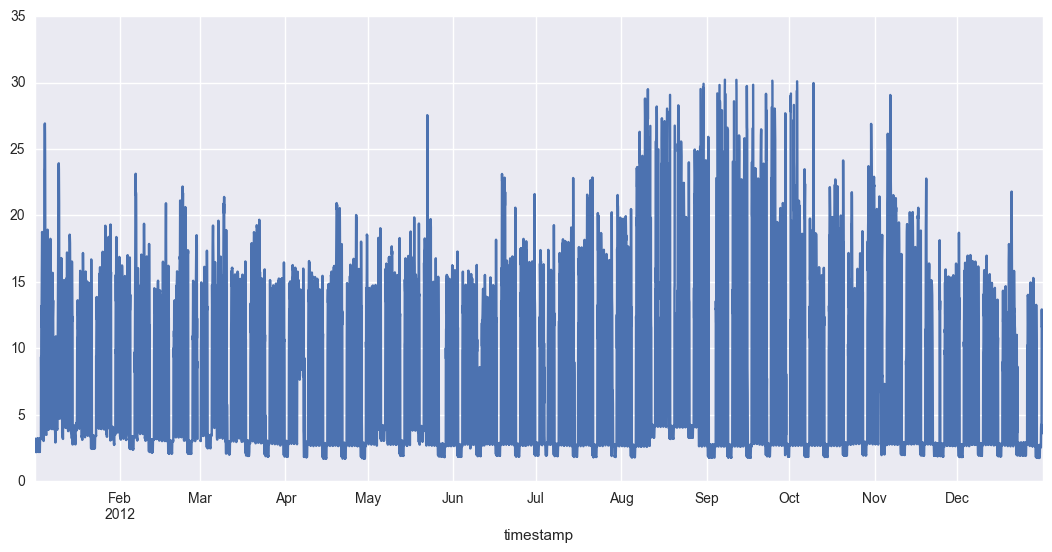

In [7]:
temp['Office_Elizabeth'][meta.ix['Office_Elizabeth']['datastart']:meta.ix['Office_Elizabeth']['dataend']].plot()

In [8]:
weather = pd.read_csv(os.path.join(repos_path,"data/external/weather/weather22.csv"),index_col="timestamp", parse_dates=True)

In [9]:
start_date = '2012-02-01'
end_date = '2012-02-03'

In [16]:
temperature = weather[['TemperatureC']].resample('H').mean()
humidity = weather[['Humidity']].resample('H').mean()
temperature = temperature[start_date:end_date]
humidity = humidity[start_date:end_date]

In [17]:
office = temp[['Office_Elizabeth']][start_date:end_date]

Function for normalize

In [18]:
def normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [21]:
frame = normalize(office.join(temperature.join(humidity)))

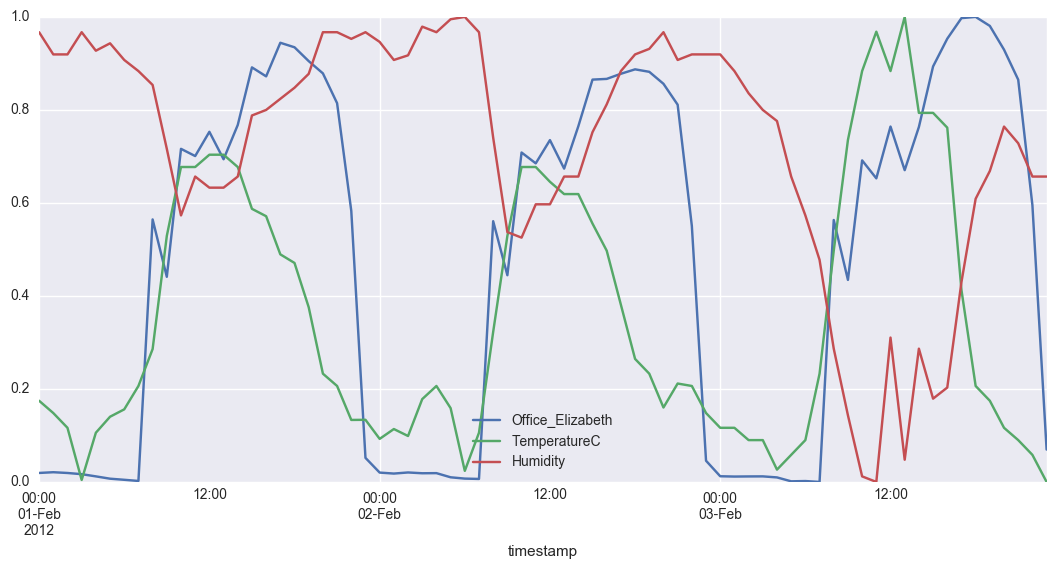

In [22]:
frame.plot()

In [26]:
weather['Wind SpeedKm/h']

timestamp
2012-01-01 00:10:00    Calm
2012-01-01 00:20:00     5.6
2012-01-01 00:52:00    Calm
2012-01-01 01:52:00    Calm
2012-01-01 02:52:00    Calm
2012-01-01 03:52:00    Calm
2012-01-01 03:57:00    Calm
2012-01-01 04:08:00    Calm
2012-01-01 04:17:00    Calm
2012-01-01 04:52:00    Calm
2012-01-01 05:52:00    Calm
2012-01-01 06:47:00    Calm
2012-01-01 06:48:00    Calm
2012-01-01 06:55:00    Calm
2012-01-01 07:06:00    Calm
2012-01-01 07:36:00    Calm
2012-01-01 07:48:00    Calm
2012-01-01 07:52:00    Calm
2012-01-01 08:52:00    Calm
2012-01-01 09:52:00    Calm
2012-01-01 10:52:00     9.3
2012-01-01 11:52:00     7.4
2012-01-01 12:52:00    13.0
2012-01-01 14:52:00    11.1
2012-01-01 15:52:00     5.6
2012-01-01 16:52:00    Calm
2012-01-01 17:52:00     5.6
2012-01-01 18:21:00    Calm
2012-01-01 18:47:00    Calm
2012-01-01 18:52:00    Calm
                       ... 
2012-12-30 19:52:00    Calm
2012-12-30 20:52:00     7.4
2012-12-30 21:52:00    Calm
2012-12-30 22:52:00     7.4
2012-12-30